# Proyecto Sprint 9

## Recolección y análisis exploratorio de los datos

In [163]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [164]:
# Read DataFrames
visits = pd.read_csv('./visits_log_us.csv', sep=',', header=0)
orders = pd.read_csv('./orders_log_us.csv', sep=',', header=0)
costs = pd.read_csv('./costs_us.csv', sep=',', header=0)

In [165]:
# Overview of DataFrame
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


No hay valores nulos, sólo se cambiará el tipo de dato a las columnas relacionadas con fechas y se cambiará el nombre a algunas columnas.

In [166]:
# Change columns names
visits.columns = ['device','end_ts','source_id','start_ts','uid']
# Change columns type
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [167]:
print(visits.head(3))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  


Se eliminarán filas duplicas (si las hay) con respecto a las columnas 'device','start_ts','uid'.

In [168]:
# Delete duplicated rows considering a few columns
visits = visits.drop_duplicates(subset=['device','start_ts','uid']).reset_index(drop=True)
# Show duplicated rows
visits[['device','start_ts','uid']].duplicated().sum()

0

El proceso anterior se aplicará a los DataFrames 'orders' y 'costs'.

In [169]:
# Overview of DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


No hay valores nulos, sólo se cambiará el tipo de dato a las columnas relacionadas con fechas y se cambiará el nombre a algunas columnas.

In [170]:
# Change columns names
orders.columns = ['order_ts','revenue','uid']
# Change column type
orders['order_ts'] = pd.to_datetime(orders['order_ts'])

In [171]:
print(orders.head(3))

             order_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844


Eliminando filas duplicadas (si las hay).

In [172]:
# Delete duplicated rows
orders = orders.drop_duplicates().reset_index(drop=True)
# Show duplicated rows
orders.duplicated().sum()

0

In [173]:
# DataFrame information
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


No hay valores nulos, sólo se cambiará el tipo de dato a las columnas relacionadas con fechas y se cambiará el nombre a algunas columnas.

In [174]:
# Change columns names
costs.columns = ['source_id','date','costs']
# Change column type
costs['date'] = pd.to_datetime(costs['date'])

In [175]:
print(costs.head(3))

   source_id       date  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53


Eliminando filas duplicadas (si las hay).

In [176]:
# Delete duplicated rows
costs = costs.drop_duplicates().reset_index(drop=True)
# Show duplicated rows
costs.duplicated().sum()

0

## Informes y métricas

### 1. Visitas

Para calcular la actividad diaria, semanal y mensual, primero crearemos columnas separadas para los valores de año, mes, semana y día.

In [177]:
# Create new columns for dates
visits['year'] = visits['start_ts'].dt.isocalendar().year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['date'] = visits['start_ts'].dt.date

In [178]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01


#### a. ¿Cuántas personas lo usan cada día, semana y mes?

In [179]:
# Group by date and calculate the mean number of unique users
dau = visits.groupby('date').agg({'uid':'nunique'}).mean()
wau = visits.groupby(['year','week']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['year','month']).agg({'uid':'nunique'}).mean()
yau = visits.groupby('year').agg({'uid':'nunique'}).mean()

Usuarios activos (en promedio) al dia, a la semana, al mes y al año son respectivamente:

In [180]:
# Obtain DAU, WAU, MAU, and YAU
print(f"{int(dau.iloc[0])}, {int(wau.iloc[0])}, {int(mau.iloc[0])} y {int(yau.iloc[0])}.")

907, 5716, 23228 y 122156.


#### b. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [181]:
# Obtain sessions per day
sessions_per_user = visits.groupby('date').agg({'uid':['count','nunique']})
sessions_per_user.columns = ['n_sessions','n_users']

sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

Las sesiones por usuario por dia son:

In [182]:
sessions_per_user['sessions_per_user'].head(5)

date
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
Name: sessions_per_user, dtype: float64

#### c. ¿Cuál es la duración de cada sesión?

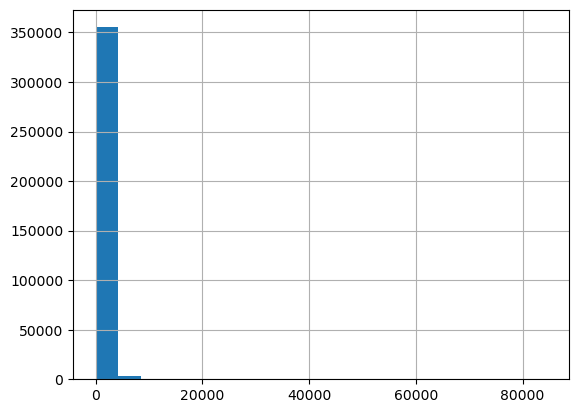

In [183]:
# Create a new column with the duration of sessions
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# Plot a histogram to see the data distribution
visits['duration_sec'].hist(bins=20)
plt.show()

Dado que la distribución de los datos no es una distribución normal o casi normal, no se puede usar la media ni la mediana, se usa la moda. Entonces la duración en segundos de cada sesión en promedio es:

In [184]:
# Show the mode of the duration
print(visits['duration_sec'].mode().iloc[0])

60


#### d. ¿Con qué frecuencia los usuarios regresan?

Para medir la frecuencia de los usuarios al regresar a la app, se tiene el sticky factor = DAU/WAU o sticky factor = DAU/MAU. De modo que la frecuencia de los usuarios al regresar a la app a la semana y al mes son respectivamente:

In [185]:
# Sticky factor
sticky_factor1 = dau/wau*100
sticky_factor2 = dau/mau*100
print(f"{sticky_factor1.iloc[0]:.2f}% y {sticky_factor2.iloc[0]:.2f}%.")

15.88% y 3.91%.


### 2. Ventas

#### a. ¿Cuándo comienza la gente a comprar?

Se crearán 2 nuevos DataFrames después combinar DataFrames.

In [186]:
# Merge two DataFrames
orders_visits = pd.merge(orders,visits,on='uid')
orders_visits = orders_visits[['order_ts','uid','device','end_ts','start_ts']]

# Condition
orders_buys = orders_visits[orders_visits['order_ts'] > orders_visits['start_ts']]

# Verify if NaN values appeared when merging
print(orders_buys.isna().sum())

order_ts    0
uid         0
device      0
end_ts      0
start_ts    0
dtype: int64


A continuación se obtiene el número de compras y el números de visitas totales repectivamente:

In [187]:
# Total number of visits and buys
n_visits = orders_visits.shape[0]
n_buys = orders_buys.shape[0]
print(f"{n_visits} y {n_buys}")

761807 y 390019


La tasa de conversión es de:

In [188]:
# Conversion rate
print(f"{n_buys/n_visits*100:.2f}%")

51.20%


#### b. ¿Cuántos pedidos hacen durante un período de tiempo dado?

Se crearan 2 nuevas columnas para el año y mes de las compras.

In [189]:
# Copy DataFrame
orders2 = orders.copy()
# Create new columns for dates
orders2['year'] = orders2['order_ts'].dt.isocalendar().year
orders2['month'] = orders2['order_ts'].dt.month

Se muestra el numero de pedidos por mes de cada año:

In [190]:
# Count number of orders by month of every year 
orders_by_month = orders2.groupby(['year','month'])['order_ts'].count()
print(orders_by_month.head(10))

year  month
2017  6        2354
      7        2363
      8        1807
      9        3387
      10       5679
      11       5659
      12       6218
2018  1        4721
      2        5281
      3        5326
Name: order_ts, dtype: int64


#### c. ¿Cuál es el tamaño promedio de compra?

A partir de aquí, los cálculos de esta sección se harán con respecto al primer mes de compra de los usuarios mes a mes (cohortes mensuales) y se usara el ciclo de vida de las cohortes, el cual muestra en qué mes ocurrió un evento respecto a la distancia desde el mes de la cohorte. Entonces se agrupa por usuarios y se obtiene el mes de su primer compra.

In [191]:
# Obtain the first buy date
first_purchase_date = orders2.groupby('uid')['order_ts'].min()

# Change Series name
first_purchase_date.name = 'fisrt_order_month'

In [192]:
# Merge 'first_purchase_date' to 'orders'
orders2 = orders2.join(first_purchase_date, on = 'uid')
print(orders2.head(3))

             order_ts  revenue                   uid  year  month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017      6   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017      6   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017      6   

    fisrt_order_month  
0 2017-06-01 00:10:00  
1 2017-06-01 00:25:00  
2 2017-06-01 00:27:00  


Se ha creado la columna que especifica la fecha de la primer compra por usuario. A continuación se creará una nueva columna 'purchase_month' para redondear la fecha a mes de la columna 'order_ts' con el metodo ".dt.to_period('M').dt.to_timestamp()".

In [193]:
# Create new columns and trunc date to month
orders2['purchase_month'] = orders2['order_ts'].dt.to_period('M').dt.to_timestamp()

# Truncate 'fisrt_order_month' to month
orders2['fisrt_order_month'] = orders2['fisrt_order_month'].dt.to_period('M').dt.to_timestamp()
orders2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_ts           50415 non-null  datetime64[ns]
 1   revenue            50415 non-null  float64       
 2   uid                50415 non-null  uint64        
 3   year               50415 non-null  UInt32        
 4   month              50415 non-null  int32         
 5   fisrt_order_month  50415 non-null  datetime64[ns]
 6   purchase_month     50415 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](3), float64(1), int32(1), uint64(1)
memory usage: 2.4 MB


In [194]:
print(orders2.head(3))

             order_ts  revenue                   uid  year  month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017      6   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017      6   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017      6   

  fisrt_order_month purchase_month  
0        2017-06-01     2017-06-01  
1        2017-06-01     2017-06-01  
2        2017-06-01     2017-06-01  


**Nota:** Se tomará la fecha de la compra ('order_ts') como un identificador de compra para generar la nueva tabla 'orders_by_cohorts'. Se creará otro DataFrame para no alterar el DataFrame 'orders'.

In [195]:
#Group by 'fisrt_order_month' and 'purchase_month'
orders_by_cohorts = orders2.groupby(
    ['fisrt_order_month','purchase_month']
).agg({'order_ts':'nunique','uid':'nunique'})

print(orders_by_cohorts.head())

                                  order_ts   uid
fisrt_order_month purchase_month                
2017-06-01        2017-06-01          2245  2023
                  2017-07-01           176    61
                  2017-08-01           174    50
                  2017-09-01           223    54
                  2017-10-01           292    88


**Nota:** El DataFrame 'orders_by_cohorts' no tiene la columna 'revenue'. Por tal motivo en la siguiente pregunta se volvera a agrupar.

In [196]:
#Calculate orders per user
orders_by_cohorts['orders_per_user'] = (
    orders_by_cohorts['order_ts'] / orders_by_cohorts['uid']
)
#Reset index
orders_by_cohorts = orders_by_cohorts.reset_index()

Así obtenemos el tamaño de compra promedio por usuario para cada mes (sin considerar el ciclo de vida de las cohortes).

In [197]:
orders_per_user_table = orders_by_cohorts.pivot_table(
    index = 'fisrt_order_month', columns = 'purchase_month',
    values = 'orders_per_user', aggfunc = 'mean'
)
orders_per_user_table

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
fisrt_order_month,,,,,,,,,,,,,
2017-06-01,1.109738,2.885246,3.480000,4.129630,3.318182,3.238806,4.435484,3.702128,3.655172,3.377778,2.133333,1.622642,NaN
2017-07-01,NaN,1.079563,1.923077,2.105263,1.609375,1.469388,2.157895,1.666667,1.256410,1.380952,1.090909,2.038462,NaN
2017-08-01,NaN,NaN,1.081022,1.844828,1.886792,1.818182,2.100000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN
2017-09-01,NaN,NaN,NaN,1.079427,1.684615,1.600000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN
2017-10-01,NaN,NaN,NaN,NaN,1.044470,1.519417,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,1.049743,1.756757,1.500000,1.981132,1.679012,1.229167,1.645161,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1.059092,1.842466,1.961165,1.845361,1.720000,1.666667,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051290,1.947368,1.915663,1.488372,1.733333,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032320,1.872881,1.431034,1.794872,NaN


Ahora se obtendrán los cambios en las compras por usuario en relación con el tiempo transcurrido desde la primera compra usando el ciclo de vida de la cohorte.

Para encontrar el ciclo de vida de la cohorte, primero agrupamos por 'fisrt_order_month' y por 'purchase_month', luego, restaremos el mes de la cohorte (fisrt_order_month) del mes en que se realizaron las compras (purchase_month) y se guarda en la columna 'cohort_lifetime'. El metodo '.dt.to_period('M').dt.to_timestamp()' se usa para obtener los meses en una fecha. Finalmente, la columna 'cohort_lifetime' contendra el número entero de mese entre las fechas.

In [198]:
# Calculate 'chort_lifetime' in months
orders_by_cohorts['chort_lifetime'] = orders_by_cohorts['purchase_month'].dt.to_period('M').astype(int) - orders_by_cohorts['fisrt_order_month'].dt.to_period('M').astype(int)

# This line is not supported anymore in pandas 2.0
#orders_by_cohorts['chort_lifetime'] = orders_by_cohorts['chort_lifetime'] / np.timedelta64('M')

# Round column 'chort_lifetime'
#orders_by_cohorts['chort_lifetime'] = orders_by_cohorts['chort_lifetime'].round().astype('int')

Así obtenemos el tamaño de compra promedio por usuario para cada mes considerando el ciclo de vida de las cohortes.

In [199]:
lifetime_pivot = orders_by_cohorts.pivot_table(
    index = 'fisrt_order_month', columns = 'chort_lifetime',
    values = 'orders_per_user', aggfunc = 'mean'
)
lifetime_pivot

chort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
fisrt_order_month,,,,,,,,,,,,
2017-06-01,1.109738,2.885246,3.480000,4.129630,3.318182,3.238806,4.435484,3.702128,3.655172,3.377778,2.133333,1.622642
2017-07-01,1.079563,1.923077,2.105263,1.609375,1.469388,2.157895,1.666667,1.256410,1.380952,1.090909,2.038462,NaN
2017-08-01,1.081022,1.844828,1.886792,1.818182,2.100000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.079427,1.684615,1.600000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.044470,1.519417,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.049743,1.756757,1.500000,1.981132,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.059092,1.842466,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.051290,1.947368,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.032320,1.872881,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuación se muestra la tabla anterior usando un mapa de calor.

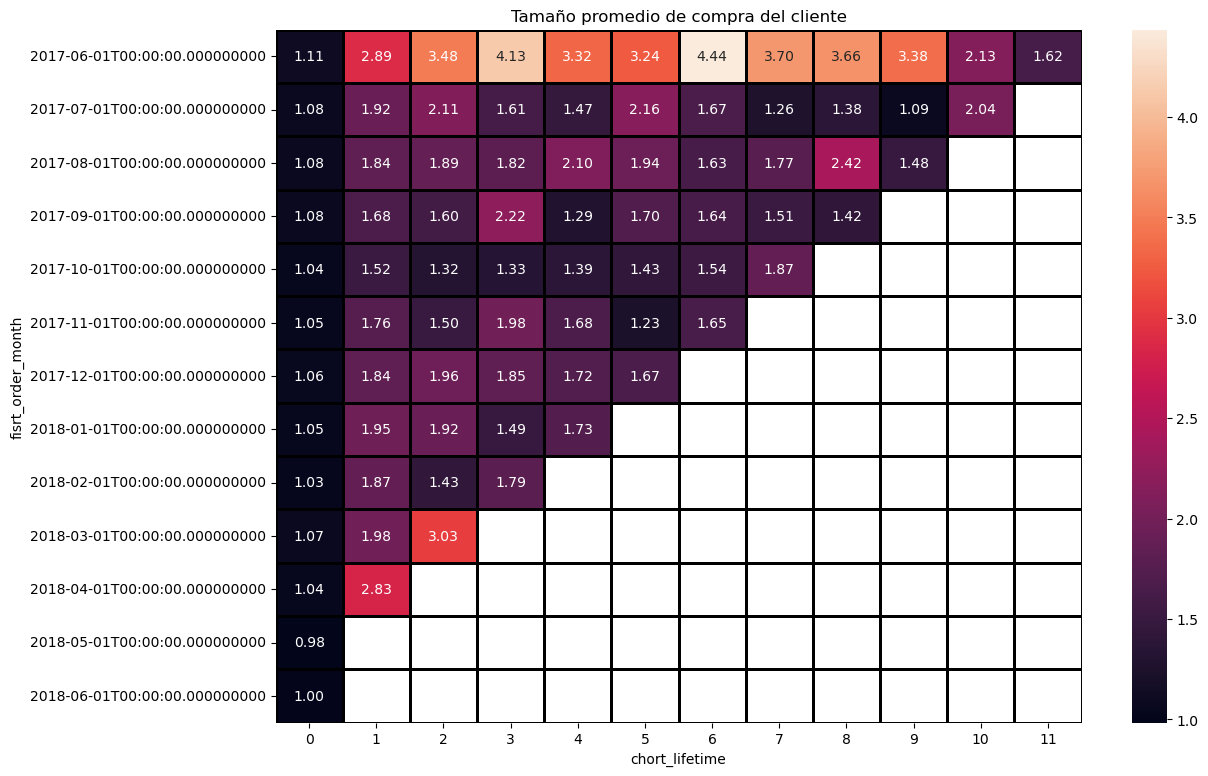

In [200]:
plt.figure(figsize=(13,9))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    lifetime_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='black'
)
plt.show()

#### d. ¿Cuánto dinero traen? (LTV)

**Nota:** Se asumirá un margen de ganancia del 50% y se usarán los ciclos de vida de las cohortes como en el inciso anterior.

Se repetira un poco del proceso mostrado anteriormente. Se calcularán las cohortes por fecha de primer compra y ciclo de vida de las mismas. 

In [201]:
# Create new column of type 'datetime'
orders['order_month'] = orders['order_ts'].dt.to_period('M').dt.to_timestamp()

# Obtain first order month
first_orders = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['uid','first_order_month']
print(first_orders.head(3))

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01


Calcularemos el número de nuevos clientes (n_buyers) para cada mes.

In [202]:
# Obtain number of users by cohort
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month','n_buyers']
print(cohort_sizes.head(3))

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370


Cambinamos los DataFrames.

In [203]:
# Merge DataFrames
orders_ = pd.merge(orders,first_orders, on='uid')
print(orders_.head(3))

             order_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  


Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y totalizar los ingresos. Vamos a establecer el índice por defecto usando el método reset_index():

In [204]:
# Group by 'first_order_month' and 'order_month' obtain total revenue
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
print(cohorts.head(3))

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34


La fila de la tabla cohort especifica los ingresos que generó la cohorte. Por ejemplo, en la fila 0 podemos ver que los clientes que realizaron su primer pedido en junio de 2017 generaron un ingreso total de $9557.5 ese mes.

El LTV es el ingreso acumulado de una cohorte, que representa la cantidad de personas en la cohorte. Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts:

In [205]:
# Merge DataFrames
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head(3)

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34


Solo dos pasos más y tendremos el LTV. Primero, dado que el LTV se calcula sobre la base del beneficio bruto en lugar de los ingresos, debemos encontrar el beneficio bruto multiplicando los ingresos por la rentabilidad. En segundo lugar, el LTV es un parámetro relativo y es más fácil de estudiar para cohortes "maduras", así que hagamos que las columnas muestren la edad de la cohorte en lugar del mes del pedido.

In [206]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = report['order_month'].dt.to_period('M').astype(int) - report['first_order_month'].dt.to_period('M').astype(int)

# Not supported anymore in pandas 2.0
#report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1,'M')#
#report['age'] = report['age'].round().astype('int')

In [207]:
# Show the report DataFrame
print(report.head())

  first_order_month  n_buyers order_month  revenue        gp  age
0        2017-06-01      2023  2017-06-01  9557.49  4778.745    0
1        2017-06-01      2023  2017-07-01   981.82   490.910    1
2        2017-06-01      2023  2017-08-01   885.34   442.670    2
3        2017-06-01      2023  2017-09-01  1931.30   965.650    3
4        2017-06-01      2023  2017-10-01  2068.58  1034.290    4


Finalmente, el LTV es el beneficio bruto de la cohorte de cada mes entre el número total de usuarios de cada cohorte.

In [208]:
# Calculate LVT
report['ltv'] = report['gp'] / report['n_buyers']

Visualizaremos las cohortes como una tabla dinámica.

In [209]:
report_pivot = report.pivot_table(
    index = 'first_order_month', columns = 'age',
    values = 'ltv', aggfunc = 'mean'
).round()

report_pivot.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


Encontremos el LTV de la primera cohorte sumando el valor de cada mes:

In [210]:
print(report_pivot.loc['2017-06-01'].sum())

3.0


En promedio, cada cliente de la primera cohorte (2017-06-01) generó $3.0 en ingresos durante su ciclo de vida de 11 meses.

### 3. Marketing

Se calculará el CAC (costo de adquisición de clientes). Primero encontraremos los gastos totales de cada mes, luego los dividiremos entre la cantidad de clientes en cada cohorte.

In [211]:
# Create new column type 'datetime'
costs['month'] = costs['date'].dt.to_period('M').dt.to_timestamp()

# Costs per month
#costs_trim = costs[['source_id','month','month']]
monthly_costs = costs.groupby(by=['source_id','month'])['costs'].sum().reset_index()

monthly_costs.head(3)

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81


In [212]:
# Merge DataFrames
report_ = pd.merge(report,monthly_costs,left_on='first_order_month',right_on='month')

# Obtain CAC
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head(10)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-01,1125.61,0.556406
1,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,2,2017-06-01,2427.38,1.199891
2,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,3,2017-06-01,7731.65,3.821873
3,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,4,2017-06-01,3514.80,1.737420
4,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,5,2017-06-01,2616.12,1.293188
5,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,9,2017-06-01,285.22,0.140989
6,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,10,2017-06-01,314.22,0.155324
7,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1,2017-06-01,1125.61,0.556406
8,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,2,2017-06-01,2427.38,1.199891
9,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,3,2017-06-01,7731.65,3.821873


#### a. ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

Veamos cuantas fuentes de adquisición diferentes existen.

In [213]:
print(report_['source_id'].unique())

[ 1  2  3  4  5  9 10]


Se tienen 7 source_id de diferentes fuentes. Al agrupar por 'source_id' y sumar toda la columna 'costs', se obtienen los gastos totales por fuente de adquisición.

In [214]:
total_cost_by_source = report_.groupby('source_id')['costs'].sum()
total_cost_by_source

source_id
1     127585.19
2     263847.09
3     868903.37
4     378008.44
5     317923.30
9      34077.70
10     36070.85
Name: costs, dtype: float64

Ahora se mostrará el costo total de todo el marketing a lo largo del tiempo.

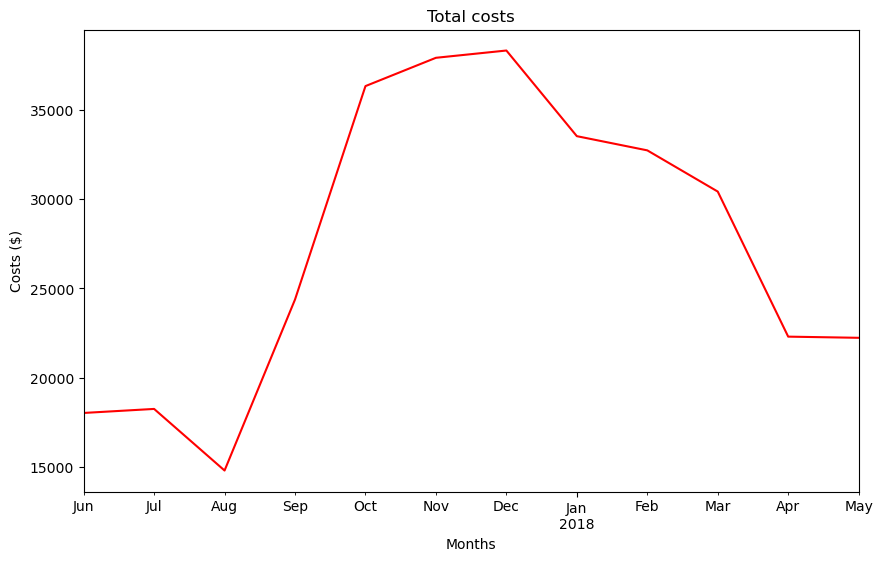

In [215]:
# Obtain total costs per month
costs_time = costs.groupby('month')['costs'].sum()

# Line plot
costs_time.plot(kind='line', title='Total costs', figsize=(10,6),
               xlabel='Months', ylabel='Costs ($)', color='red')
plt.show()

Ahora se mostrará el ingreso total de las ventas a lo largo del tiempo.

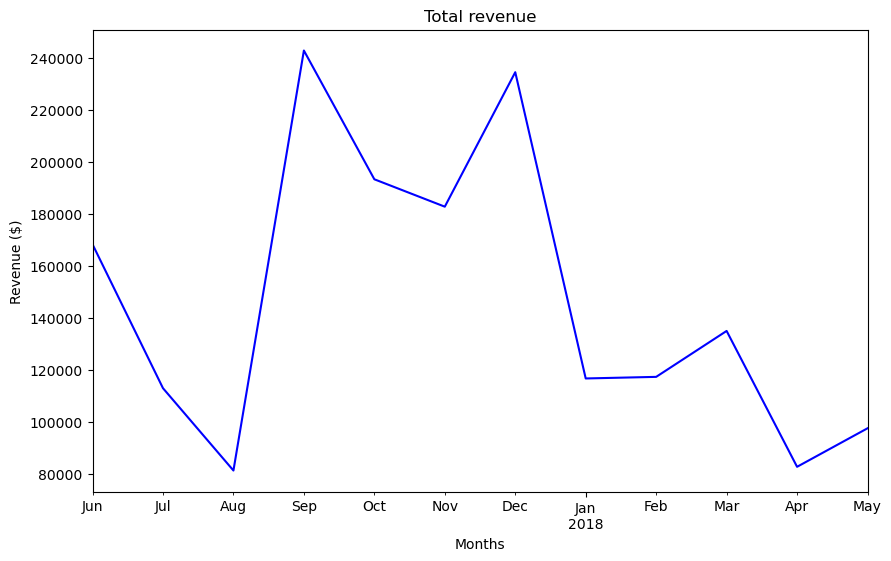

In [216]:
# Obtain total revenue per month
revenue_time = report_.groupby('month')['revenue'].sum()

# Line plot
revenue_time.plot(kind='line', title='Total revenue', figsize=(10,6),
               xlabel='Months', ylabel='Revenue ($)', color='blue')
plt.show()

**Conclusión:** Tomando en cuenta las 2 gráficas de arriba, se puede suponer que las ganacias fueron mucho mayores a los gastos de marketing, pero eso se mostrará más adelante.

#### b. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [217]:
total_cac_by_source = report_.groupby('source_id')['cac'].sum()
total_cac_by_source

source_id
1      45.587828
2      93.956107
3     309.730341
4     139.473671
5     113.230671
9      12.157186
10     12.816800
Name: cac, dtype: float64

Para la fuente de adquisición con source_id '1', el costo de atraer un cliente en promedio fue de $45.58.

#### c. ¿Cuán rentables eran las inversiones? (ROMI)

ROMI = LTV / CAC.

In [218]:
# Obtain ROMI
report_['romi'] = report_['ltv'] / report_['cac']

In [219]:
# Group by 'first_order_month' and 'age', to obtain 'mean' of 'romi'
rep_romi = report_.pivot_table(
    index = 'first_order_month', columns = 'age',
    values = 'romi', aggfunc = 'mean'
)
rep_romi.round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,6.00,0.62,0.56,1.21,1.30,0.93,1.21,0.74,0.70,0.77,0.73,0.33
2017-07-01,6.97,0.39,0.72,0.42,0.21,0.18,0.14,0.16,0.19,0.17,0.18,NaN
2017-08-01,5.60,0.50,0.49,0.42,0.52,0.30,0.22,0.43,0.31,0.20,NaN,NaN
2017-09-01,6.38,1.26,0.59,4.49,0.45,0.73,0.79,0.27,0.21,NaN,NaN,NaN
2017-10-01,6.62,0.71,0.25,0.21,0.20,0.16,0.11,0.15,NaN,NaN,NaN,NaN
2017-11-01,5.60,0.43,0.22,0.35,0.16,0.06,0.12,NaN,NaN,NaN,NaN,NaN
2017-12-01,6.02,0.33,1.18,1.35,0.40,0.43,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.56,0.33,0.34,0.16,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,5.43,0.36,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para calcular el ROMI acumulado, se usa el método cumsum().

In [220]:
# Cumulative sum of ROMI by rows (axis=1)
rep_romi.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,6.00,6.61,7.17,8.38,9.68,10.61,11.82,12.56,13.26,14.03,14.75,15.08
2017-07-01,6.97,7.36,8.08,8.5,8.71,8.89,9.03,9.19,9.38,9.55,9.73,
2017-08-01,5.60,6.1,6.59,7.01,7.53,7.83,8.06,8.49,8.8,9.0,,
2017-09-01,6.38,7.64,8.23,12.72,13.18,13.91,14.7,14.98,15.18,,,
2017-10-01,6.62,7.33,7.58,7.79,7.99,8.15,8.26,8.41,,,,
2017-11-01,5.60,6.04,6.25,6.61,6.77,6.82,6.95,,,,,
2017-12-01,6.02,6.36,7.53,8.89,9.28,9.71,,,,,,
2018-01-01,4.56,4.89,5.22,5.38,5.45,,,,,,,
2018-02-01,5.43,5.8,5.9,6.0,,,,,,,,


De manera general sí se recupera la inversión de marketing para todas las cohortes. Se hará el mismo análisis para las fuentes de adquisición con source_id: 1 y 3. El análisis para las demás es similar.

In [221]:
#Filter DataFrame by 'source_id'
source_1 = report_[report_['source_id'] == 1]

#Group by 'first_order_month' and columns = 'age', to obtain 'mean'
romi_1 = source_1.pivot_table(
    index = 'first_order_month', columns = 'age',
    values = 'romi', aggfunc = 'mean'
)
# Cumulative sum of ROMI by rows (axis=1)
romi_1.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.25,4.68,5.07,5.93,6.85,7.51,8.37,8.89,9.39,9.93,10.44,10.67
2017-07-01,5.39,5.69,6.25,6.57,6.73,6.87,6.97,7.1,7.24,7.38,7.52,
2017-08-01,3.80,4.14,4.47,4.75,5.1,5.31,5.46,5.75,5.96,6.1,,
2017-09-01,4.85,5.81,6.26,9.67,10.02,10.57,11.18,11.39,11.54,,,
2017-10-01,4.69,5.19,5.37,5.52,5.66,5.77,5.85,5.96,,,,
2017-11-01,4.30,4.63,4.8,5.07,5.2,5.24,5.34,,,,,
2017-12-01,4.44,4.68,5.54,6.54,6.83,7.15,,,,,,
2018-01-01,3.19,3.42,3.65,3.76,3.81,,,,,,,
2018-02-01,3.44,3.67,3.74,3.8,,,,,,,,


Se puede ver que la fuente de adquisición 1 (source_id = 1), recuperó la inversión desde el primer mes (age = 0).

In [222]:
#Filter DataFrame by 'source_id'
source_3 = report_[report_['source_id'] == 3]

#Group by 'first_order_month' and columns = 'age', to obtain 'mean'
romi_3 = source_3.pivot_table(
    index = 'first_order_month', columns = 'age',
    values = 'romi', aggfunc = 'mean'
)
# Cumulative sum of ROMI by rows (axis=1)
romi_3.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.62,0.68,0.74,0.86,1.0,1.09,1.22,1.29,1.37,1.45,1.52,1.55
2017-07-01,0.75,0.8,0.87,0.92,0.94,0.96,0.97,0.99,1.01,1.03,1.05,
2017-08-01,0.59,0.64,0.69,0.74,0.79,0.82,0.85,0.89,0.92,0.94,,
2017-09-01,0.73,0.88,0.94,1.46,1.51,1.59,1.68,1.72,1.74,,,
2017-10-01,0.69,0.76,0.79,0.81,0.83,0.85,0.86,0.88,,,,
2017-11-01,0.62,0.67,0.69,0.73,0.75,0.75,0.77,,,,,
2017-12-01,0.64,0.68,0.8,0.94,0.99,1.03,,,,,,
2018-01-01,0.47,0.5,0.54,0.56,0.56,,,,,,,
2018-02-01,0.53,0.57,0.58,0.59,,,,,,,,


Se puede ver que la fuente de adquisición 3 (source_id = 3), recuperó la inversión hasta el noveno mes aproximadamente (age = 8). Finalmente, se muestra el ROMI acumulado promedio de todas las cohortes y de todas las fuentes de adquisición.

In [223]:
# Mean of cumulative ROMI by rows (axis=1) and by columns (axis=0)
rep_romi.cumsum(axis=1).mean(axis=0)

age
0      5.973284
1      6.434150
2      6.975904
3      7.918670
4      8.572451
5      9.417840
6      9.801649
7     10.724196
8     11.654281
9     10.857499
10    12.241304
11    15.079917
dtype: float64

Se concluye que las inversiones en marketing fueron rentables, es decir, recuperaron la inversión rapidamente (desde el primer mes).

## Aconseja a los expertos de marketing cuánto dinero invertir y dónde

Lo más importante es identificar que métricas necesitas para hacer tu análisis, porque al final el analista es quien tomará las desiciones definitivas para implementar mejoras y estrategías para elevar las ventas o el número de potenciales clientes.

Con base en lo anterior, se debería usar un poco cada plataforma para determinar cual te parece la mejor respecto a tus necesidades, cúal obtiene más métricas, cúal las muestra mejor (con gráficas o con números), etc.

En lo personal, me enfocaría en plataformas que obtienen las métricas de vanidad, porque si tu producto es bueno y se vende, es importante investigar el por qué otros productos no se venden, para ello necesitaremos las métricas de vanidad para determinar por qué los usuarios se van o entran y salen sin comprar.

Por último, yo empezaría a usar Google Analytics, Mixpanel y Open Web Analytics, fueron las que me parecieron más claras y fáciles de usar para comenzar.